In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [80]:
df = pd.read_csv("Assignment10_data/glass.data", header=None) 

In [81]:
df.columns = ['ID', 'RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type of glass']

In [82]:
df.head(5)
df.describe()



,ID,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,107.500000,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,61.920648,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.000000,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,54.250000,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,107.500000,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,160.750000,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,214.000000,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


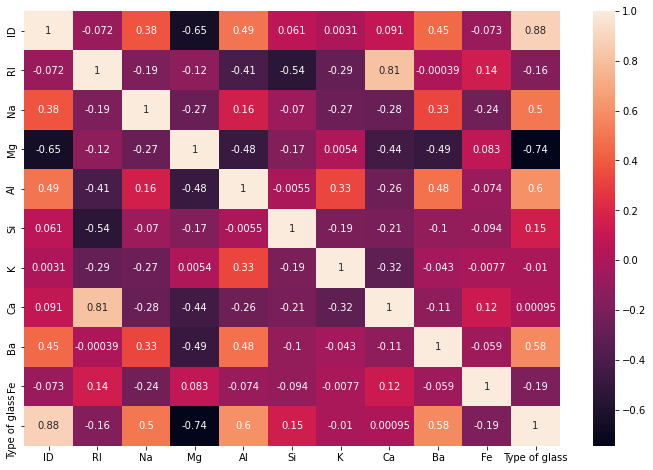

In [90]:
plt.figure(figsize=(12,8))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

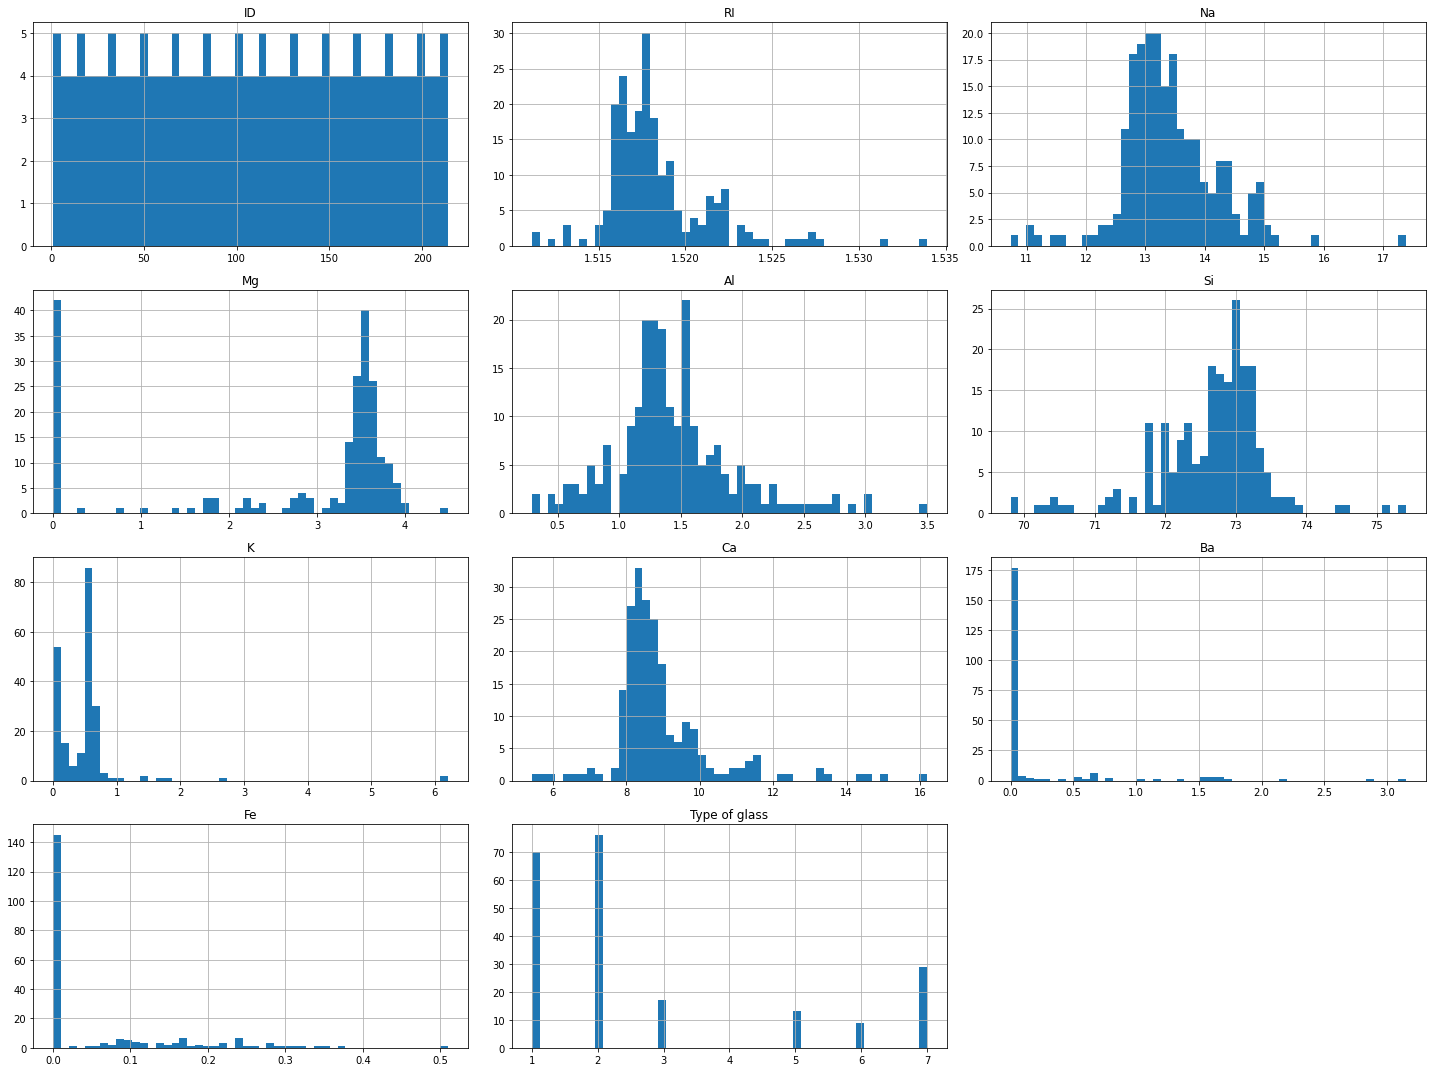

In [92]:
df.hist(bins=50, figsize=(20,15))
plt.tight_layout()
plt.show()

In [69]:
# Attribute Information:
#    1. Id number: 1 to 214
#    2. RI: refractive index
#    3. Na: Sodium (unit measurement: weight percent in corresponding oxide, as 
#                   are attributes 4-10)
#    4. Mg: Magnesium
#    5. Al: Aluminum
#    6. Si: Silicon
#    7. K: Potassium
#    8. Ca: Calcium
#    9. Ba: Barium
#   10. Fe: Iron
#   11. Type of glass: (class attribute)
#       -- 1 building_windows_float_processed
#       -- 2 building_windows_non_float_processed
#       -- 3 vehicle_windows_float_processed
#       -- 4 vehicle_windows_non_float_processed (none in this database)
#       -- 5 containers
#       -- 6 tableware
#       -- 7 headlamps

In [77]:
from sklearn import neighbors, metrics
from sklearn.preprocessing import LabelEncoder

knn = neighbors.KNeighborsClassifier(n_neighbors=8)

def standardize (df):
    for col in df.columns:
        if col != "Type of glass": # Don't standardize the categories
            df[col] = (df[col] - df[col].mean())/df[col].std()
    return df

df = standardize(df)
df.head(5)


,ID,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
0,-1.719943,0.870826,0.284287,1.251704,-0.690822,-1.124446,-0.670134,-0.145425,-0.352051,-0.585079,1
1,-1.703794,-0.248750,0.590433,0.634680,-0.170061,0.102080,-0.026152,-0.791877,-0.352051,-0.585079,1
2,-1.687644,-0.719631,0.149582,0.600016,0.190465,0.437760,-0.164148,-0.827010,-0.352051,-0.585079,1
3,-1.671494,-0.232286,-0.242285,0.697076,-0.310266,-0.052850,0.111844,-0.517838,-0.352051,-0.585079,1
4,-1.655344,-0.311315,-0.168810,0.648546,-0.410413,0.553957,0.081178,-0.623237,-0.352051,-0.585079,1


In [71]:
X = df.drop(["Type of glass"],axis=1)
y = df["Type of glass"]


X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [72]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=8)

In [73]:
# def standardize (df):
#     for col in df.columns:
#         if col != "Type of glass": # Don't standardize the categories
#             df[col] = (df[col] - df[col].mean())/df[col].std()
#     return df

In [74]:
# # Standardize data
# train = standardize(train)
# test = standardize(test)
# train.head()

In [75]:
# Create k-NN classifiers with 3 neighbors and different distance metrics
knn_euclidean = KNeighborsClassifier(n_neighbors=8, metric="euclidean")
knn_manhattan = KNeighborsClassifier(n_neighbors=8, metric="manhattan")

# Fit the classifiers to the training data
knn_euclidean.fit(X_train, y_train)
knn_manhattan.fit(X_train, y_train)

# Predict the labels of the test data using both classifiers
y_pred_euclidean = knn_euclidean.predict(X_test)
y_pred_manhattan = knn_manhattan.predict(X_test)

# Evaluate the accuracy of the classifiers
accuracy_euclidean = np.mean(y_pred_euclidean == y_test)
accuracy_manhattan = np.mean(y_pred_manhattan == y_test)

print("Accuracy (Euclidean): {:.2f}%".format(accuracy_euclidean * 100))
print("Accuracy (Manhattan): {:.2f}%".format(accuracy_manhattan * 100))

Accuracy (Euclidean): 79.07%
Accuracy (Manhattan): 79.07%
